In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic.csv')

In [3]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
survival_by_gender = df.groupby('Sex')['Survived'].mean()
print("Survival rate by gender:\n", survival_by_gender)

Survival rate by gender:
 Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [13]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()
print("\nSurvival rate by ticket class:\n", survival_by_class)



Survival rate by ticket class:
 Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [14]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 18, 30, 50, 100], labels=['0-18', '19-30', '31-50', '51+'])
survival_by_age_group = df.groupby('AgeGroup')['Survived'].mean()
print("\nSurvival rate by age group:\n", survival_by_age_group)



Survival rate by age group:
 AgeGroup
0-18     0.503597
19-30    0.355556
31-50    0.423237
51+      0.343750
Name: Survived, dtype: float64


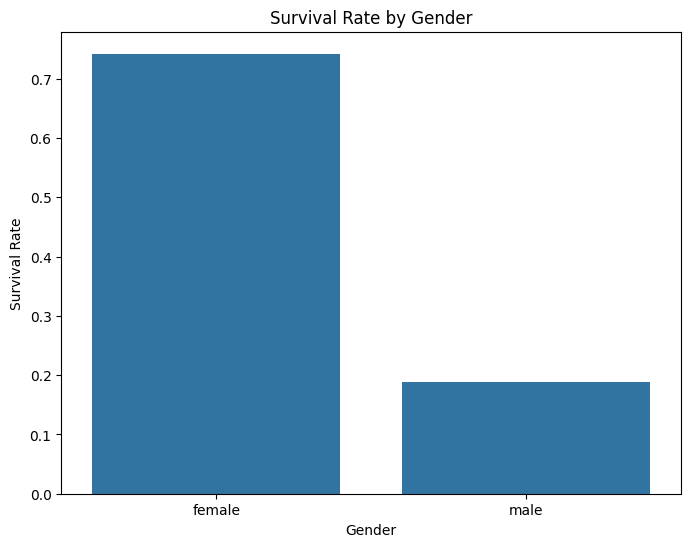

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_gender.index, y=survival_by_gender.values)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

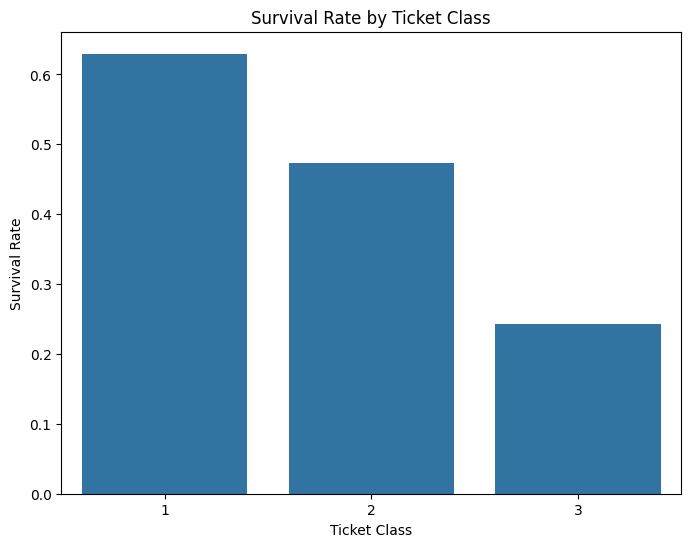

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.title('Survival Rate by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate')
plt.show()


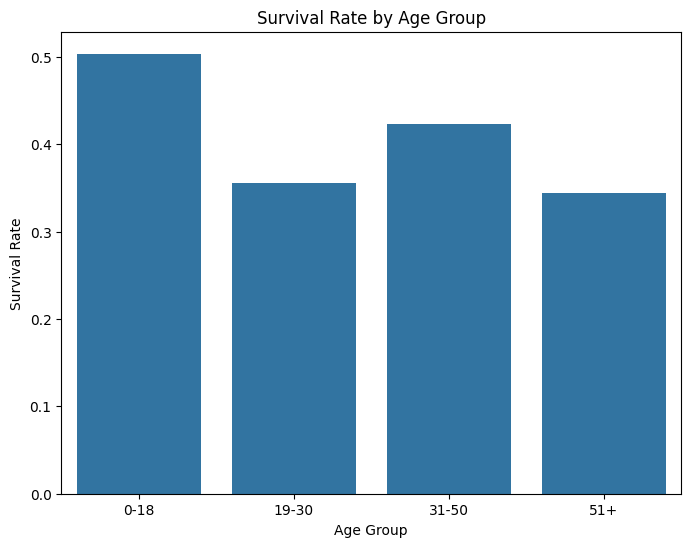

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x=survival_by_age_group.index, y=survival_by_age_group.values)
plt.title('Survival Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate')
plt.show()

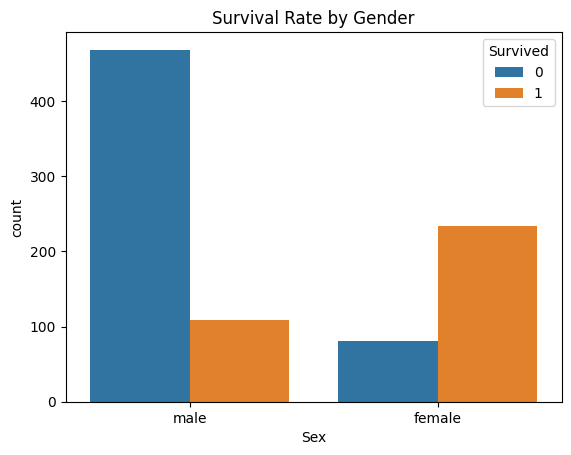

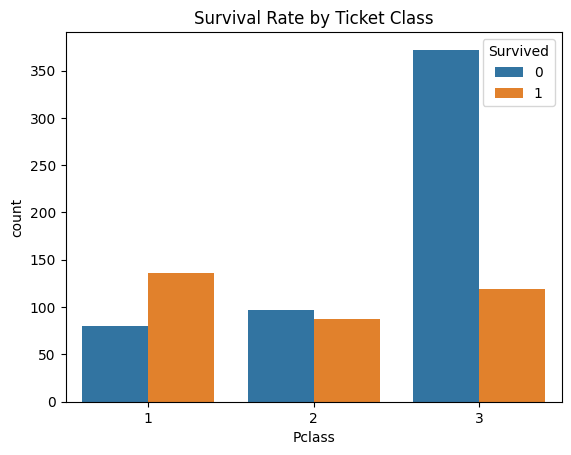

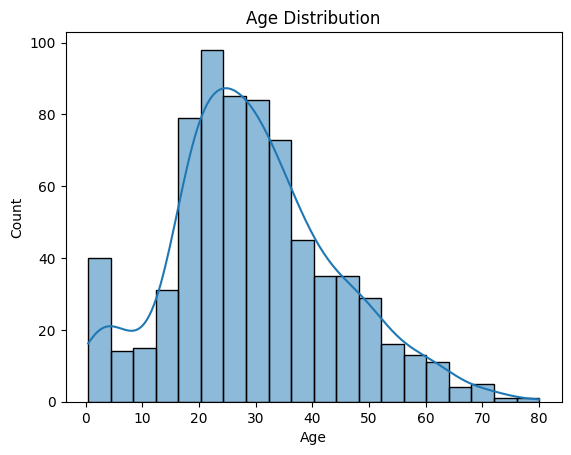

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the Titanic dataset
titanic_data = df.copy()

# Step 2: Create visualizations
# Example 1: Survival rate by gender
sns.countplot(x='Sex', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Gender')
plt.show()

# Example 2: Survival rate by ticket class
sns.countplot(x='Pclass', hue='Survived', data=titanic_data)
plt.title('Survival Rate by Ticket Class')
plt.show()

# Example 3: Age distribution
sns.histplot(titanic_data['Age'].dropna(), bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Step 3: Evaluate Insight Depth, Accuracy, and Use Cases
# For example, you can engage with stakeholders or colleagues to discuss and interpret the visualizations.
# Ask questions like:
# - What insights do you gain from the survival rate by gender/ticket class visualizations?
# - Do the age distribution patterns align with your expectations or historical knowledge?
# - How might these insights be applicable in policy-making or historical analysis?

# Step 4: Document findings
# Record the insights gained, accuracy of interpretations, and potential use cases for the visualizations.



In [9]:
import pandas as pd
import altair as alt

# Step 1: Load the Titanic dataset
titanic_data = df.copy()

# Step 2: Create visualizations
# Example 1: Survival rate by gender
survival_by_gender = alt.Chart(titanic_data).mark_bar().encode(
    x='Sex',
    y='count()',
    color='Survived:N'
).properties(
    title='Survival Rate by Gender'
)

# Example 2: Survival rate by ticket class
survival_by_class = alt.Chart(titanic_data).mark_bar().encode(
    x='Pclass:O',
    y='count()',
    color='Survived:N'
).properties(
    title='Survival Rate by Ticket Class'
)

# Example 3: Age distribution
age_distribution = alt.Chart(titanic_data).mark_bar().encode(
    alt.X('Age:Q', bin=True),
    y='count()',
).properties(
    title='Age Distribution'
)

# Display the visualizations
survival_by_gender | survival_by_class | age_distribution

# Step 3: Evaluate Insight Depth, Accuracy, and Use Cases
# For evaluation, you can follow similar steps as mentioned earlier, such as engaging stakeholders for interpretation and discussing potential use cases.

# Step 4: Document findings
# Record the insights gained, accuracy of interpretations, and potential use cases for the visualizations.



alt.HConcatChart(...)

In [10]:


# Example 1: Survival rate by gender
survival_by_gender = alt.Chart(titanic_data).mark_bar().encode(
    x='Sex',
    y='count()',
    color='Survived:N',
    column='Survived:N'
).properties(
    title='Survival Rate by Gender'
)

# Example 2: Survival rate by ticket class
survival_by_class = alt.Chart(titanic_data).mark_bar().encode(
    x='Pclass:O',
    y='count()',
    color='Survived:N',
    column='Survived:N'
).properties(
    title='Survival Rate by Ticket Class'
)

# Example 3: Age distribution
age_distribution = alt.Chart(titanic_data).mark_bar().encode(
    alt.X('Age:Q', bin=True),
    y='count()',
).properties(
    title='Age Distribution'
)

# Example 4: Survival rate by embarkation port
survival_by_embarkation = alt.Chart(titanic_data).mark_bar().encode(
    x='Embarked',
    y='count()',
    color='Survived:N',
    column='Survived:N'
).properties(
    title='Survival Rate by Embarkation Port'
)

# Example 5: Fare distribution
fare_distribution = alt.Chart(titanic_data).mark_bar().encode(
    alt.X('Fare:Q', bin=True),
    y='count()',
).properties(
    title='Fare Distribution'
)

# Display the visualizations
((survival_by_gender | survival_by_class) & (age_distribution | survival_by_embarkation) | fare_distribution).resolve_scale(y='independent')

# Step 3: Evaluate Insight Depth, Accuracy, and Use Cases
# Similar to before, engage stakeholders for interpretation and discuss potential use cases.

# Step 4: Document findings
# Record the insights gained, accuracy of interpretations, and potential use cases for the visualizations.



alt.HConcatChart(...)

In [13]:

# Step 2: Calculate numbers for the graphs

# Survival rate by gender
survival_by_gender_counts = titanic_data.groupby(['Survived', 'Sex']).size().unstack().reset_index()
print("Survival Rate by Gender:")
print(survival_by_gender_counts)

# Survival rate by ticket class
survival_by_class_counts = titanic_data.groupby(['Survived', 'Pclass']).size().unstack().reset_index()
print("\nSurvival Rate by Ticket Class:")
print(survival_by_class_counts)

# Age distribution
age_distribution_counts = pd.cut(titanic_data['Age'], bins=10).value_counts().reset_index().sort_values('index')
age_distribution_counts.columns = ['Age Range', 'Count']
print("\nAge Distribution:")
print(age_distribution_counts)

# Survival rate by embarkation port
survival_by_embarkation_counts = titanic_data.groupby(['Survived', 'Embarked']).size().unstack().reset_index()
print("\nSurvival Rate by Embarkation Port:")
print(survival_by_embarkation_counts)

# Fare distribution
fare_distribution_counts = pd.cut(titanic_data['Fare'], bins=10).value_counts().reset_index().sort_values('index')
fare_distribution_counts.columns = ['Fare Range', 'Count']
print("\nFare Distribution:")
print(fare_distribution_counts)


Survival Rate by Gender:
Sex  Survived  female  male
0           0      81   468
1           1     233   109

Survival Rate by Ticket Class:
Pclass  Survived    1   2    3
0              0   80  97  372
1              1  136  87  119

Age Distribution:
          Age Range  Count
4     (0.34, 8.378]     54
5   (8.378, 16.336]     46
0  (16.336, 24.294]    177
1  (24.294, 32.252]    169
2   (32.252, 40.21]    118
3   (40.21, 48.168]     70
6  (48.168, 56.126]     45
7  (56.126, 64.084]     24
8  (64.084, 72.042]      9
9    (72.042, 80.0]      2

Survival Rate by Embarkation Port:
Embarked  Survived   C   Q    S
0                0  75  47  427
1                1  93  30  217

Fare Distribution:
           Fare Range  Count
0    (-0.512, 51.233]    732
1   (51.233, 102.466]    106
2  (102.466, 153.699]     31
6  (153.699, 204.932]      2
3  (204.932, 256.165]     11
4  (256.165, 307.398]      6
7   (307.398, 358.63]      0
8   (358.63, 409.863]      0
9  (409.863, 461.096]      0
5  (461.